In [1]:
import pandas as pd
import seaborn as sns

In [2]:
wine = pd.read_csv('../data/winequality-red.csv')
wine.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Now we will look at some initial plotting of the data

Our first step will be to discretize the quality measure of the wine. We will break the wines into 3 categories: Bad, Average, and Good. 

These classes will be defined as follows:

0-3: Bad

4-7: Average

8-10: Good

In [3]:
wine.quality = pd.cut(wine.quality, bins=3, labels=['bad','average','good'])

In [4]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,average
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,average
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,average
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,average
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,average


Now, we will graph each variable vs. quality and try to visualize any correlations

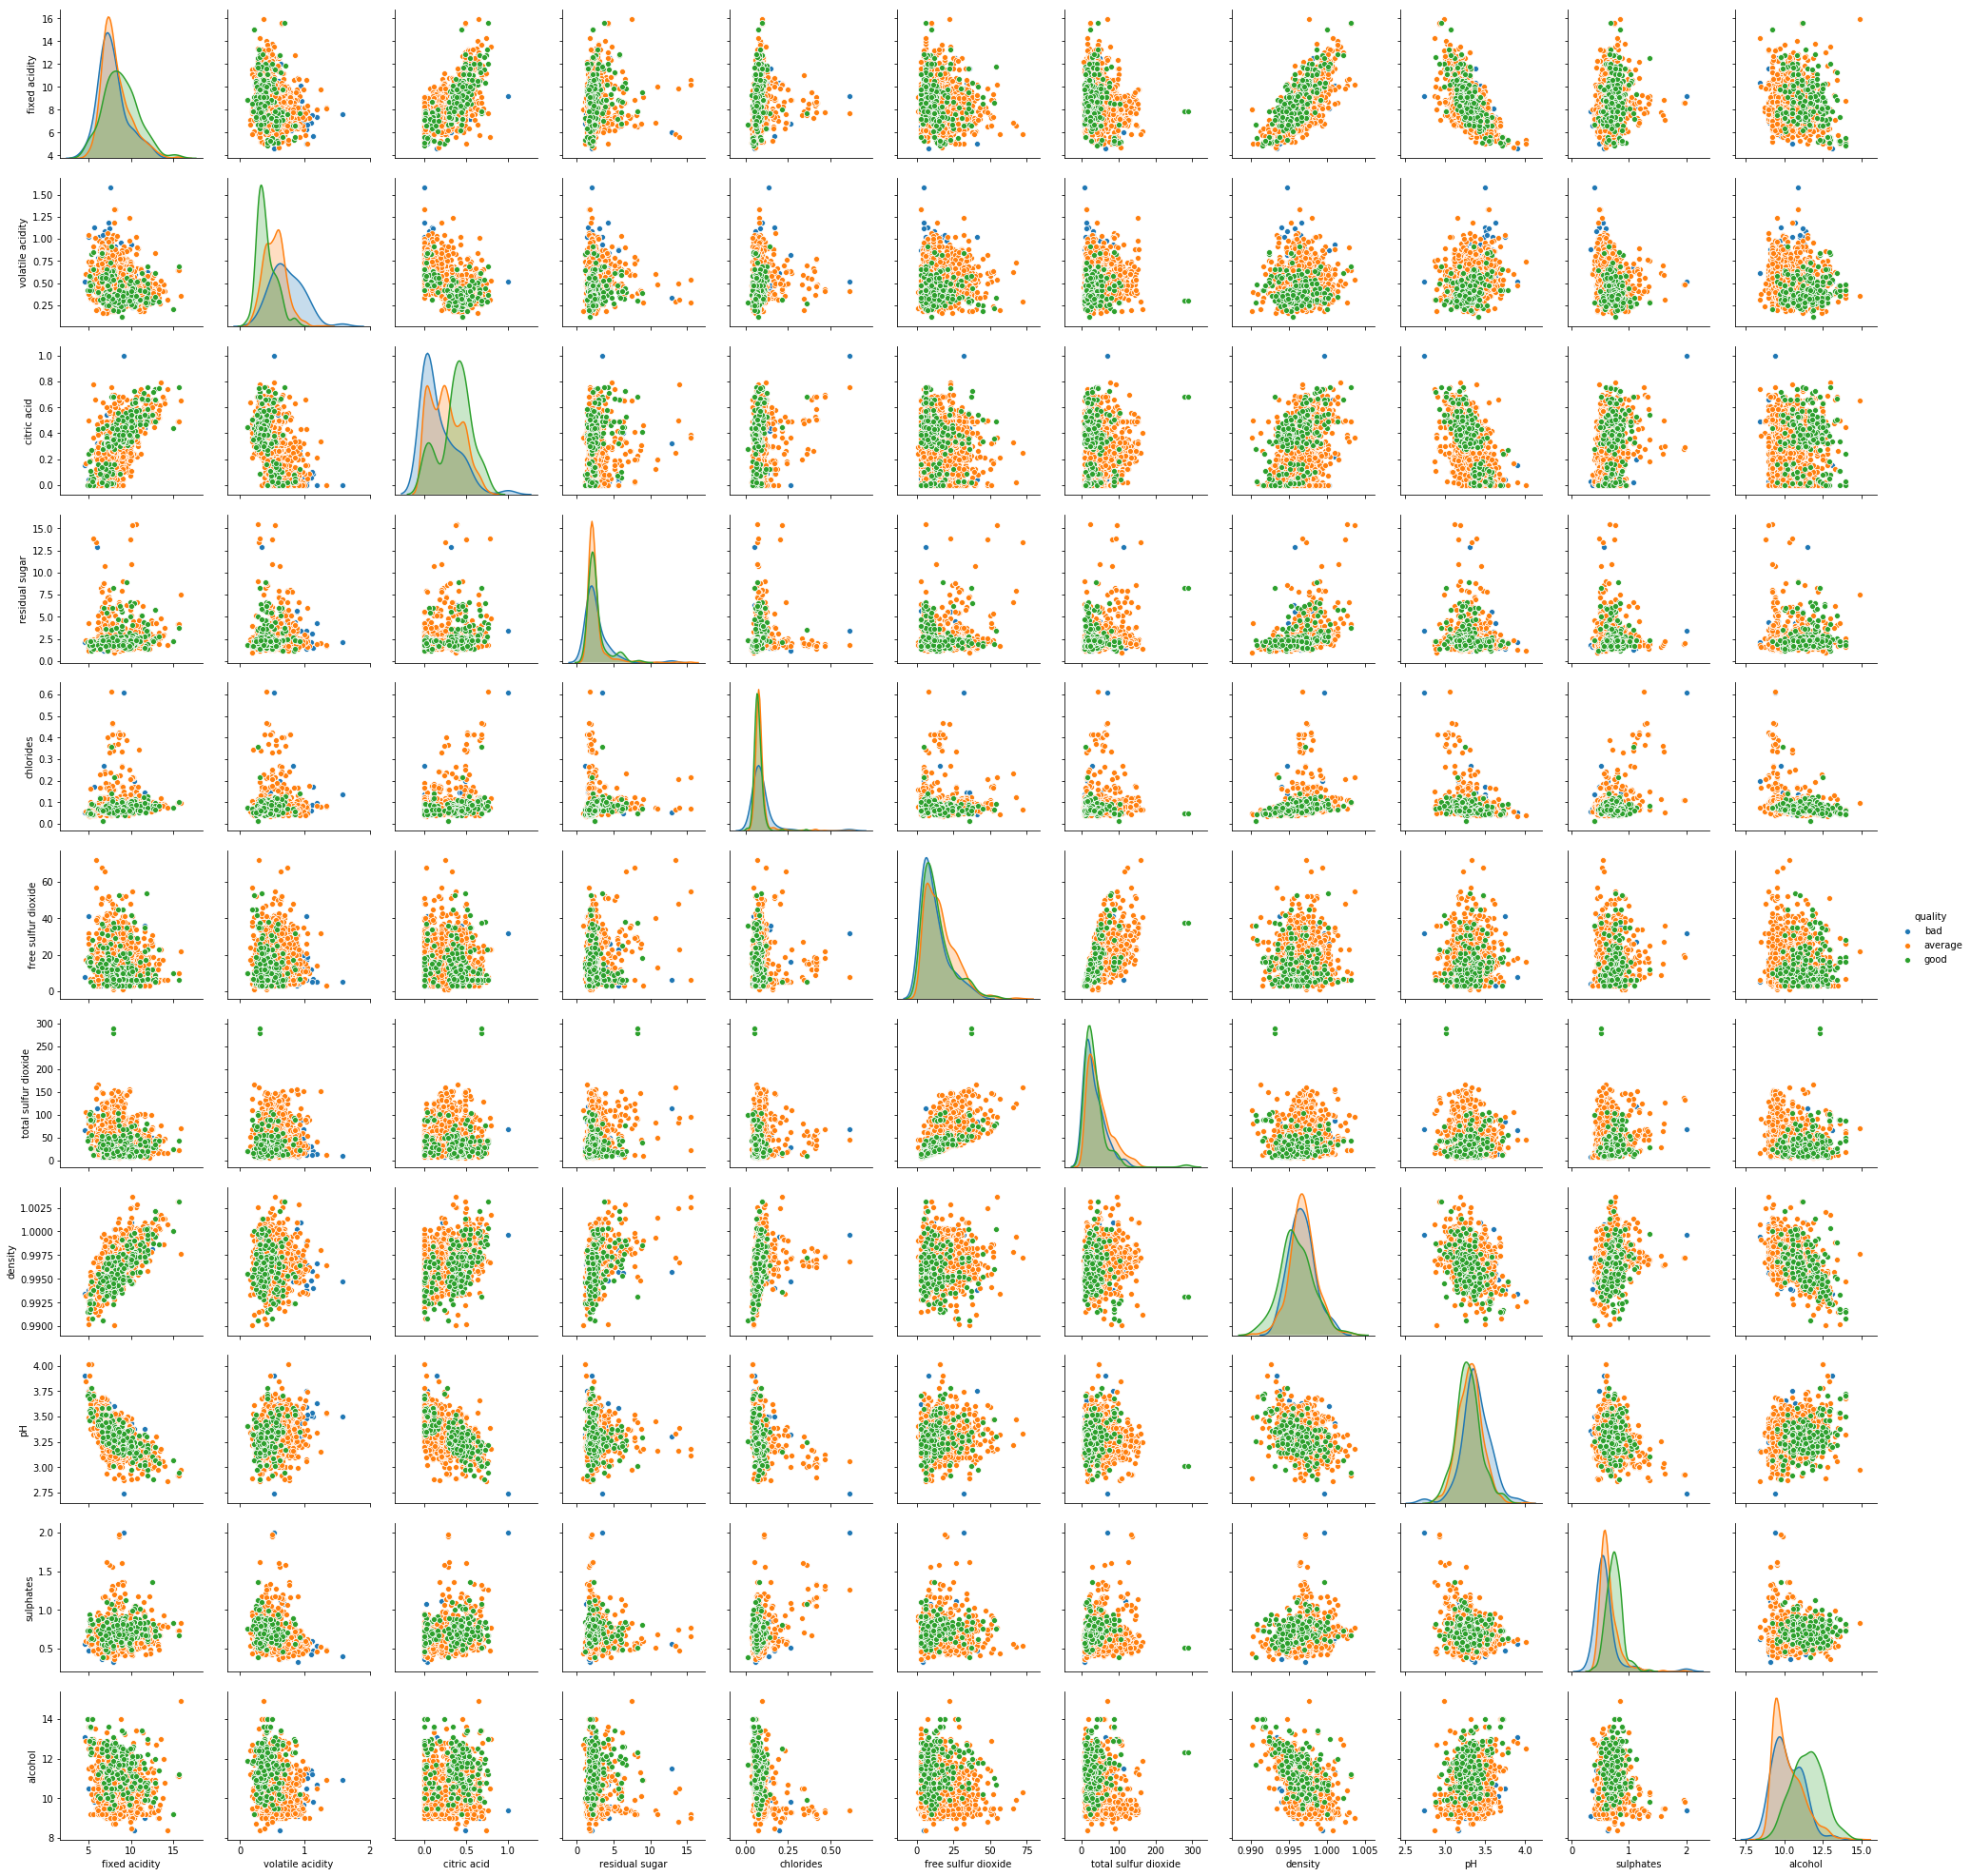

In [5]:
x = list(wine)
pp = sns.pairplot(data=wine, hue='quality')

Since our above figures don't really show any significant correlations, we have decided to try and discretize our columns and view the results as a bar graph instead. 

In [6]:
b = [i for i in x if i != "quality"]
for feature in b:
    wine[feature] = pd.cut(wine[feature], bins=4, labels=['low', 'med-low', 'med-high', 'high'])

Graph a similar plot as above using the newly discretized data and a bar plot

In [7]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
encodedwine = wine.apply(le.fit_transform)

It really appears that classifying the wines will be somewhat difficult, since the gaussian bell curves on the pairplot diagonal are nearly overlapping